In [1]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

#Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Exploring
import scipy.stats as stats

#Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format='{:20,.2f}'.format

import acquire
import summarize
import prepare

In [2]:
df=acquire.get_mallcustomer_data()
df=prepare.data_prep(df,cols_to_remove=[],prop_required_column=.6,prop_required_row=.75)
train,test=train_test_split(df,random_state=42)

In [4]:
scaler=MinMaxScaler()
num_vars=list(train.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(','.join(num_vars[:-1]),num_vars[-1]))

train[num_vars]=scaler.fit_transform(train[num_vars])

Scaling age,annual_income, and spending_score...


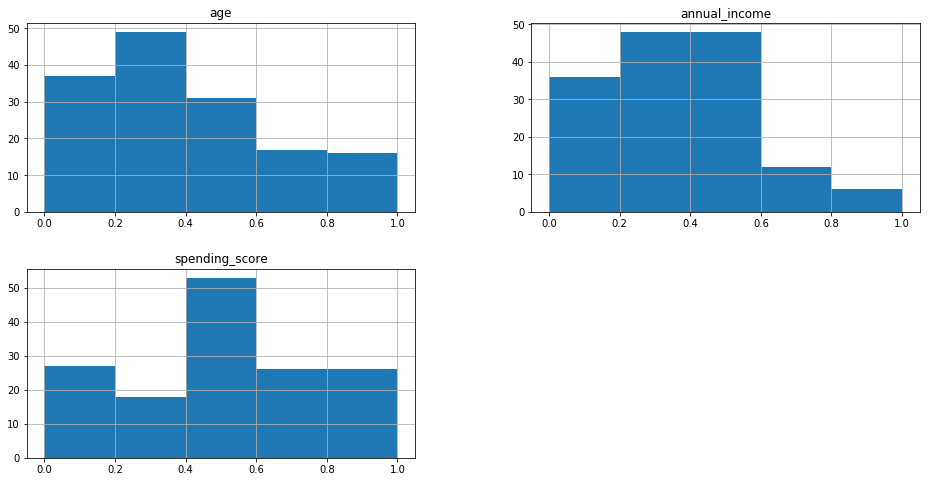

In [35]:
train.hist(figsize=(16,8),bins=5)
plt.show()

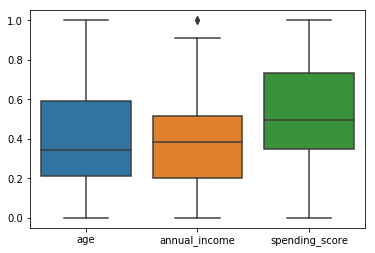

In [36]:
sns.boxplot(data=train)
plt.show()

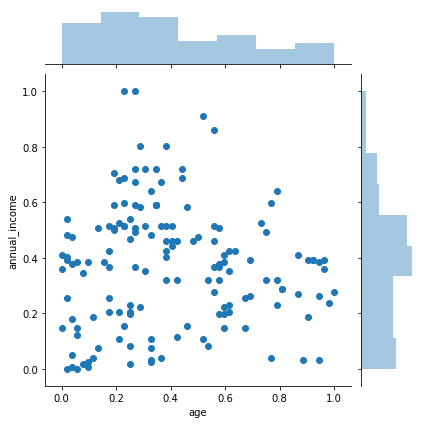

In [38]:
sns.jointplot(x='age',y='annual_income',data=train)
plt.show()

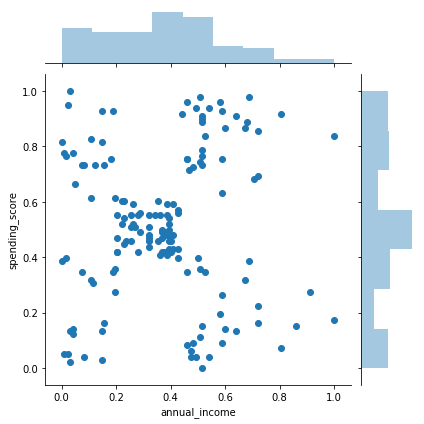

In [39]:
sns.jointplot(data=train,x='annual_income',y='spending_score')
plt.show()

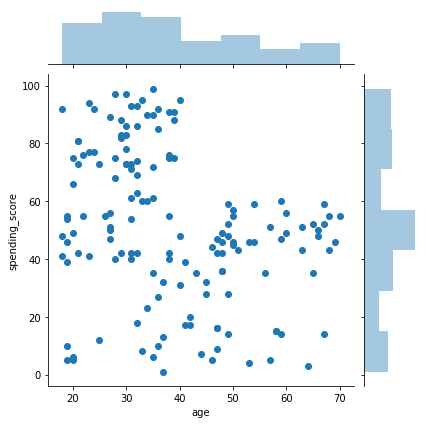

In [19]:
sns.jointplot(data=train,x='age',y='spending_score')
plt.show()

0


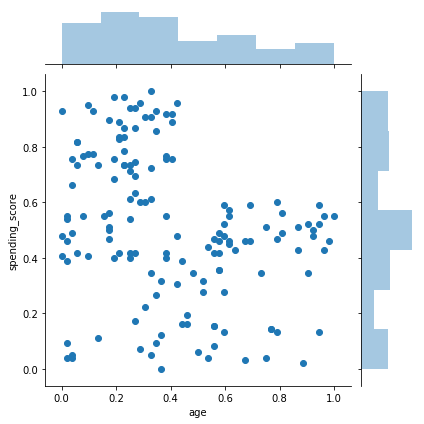

1


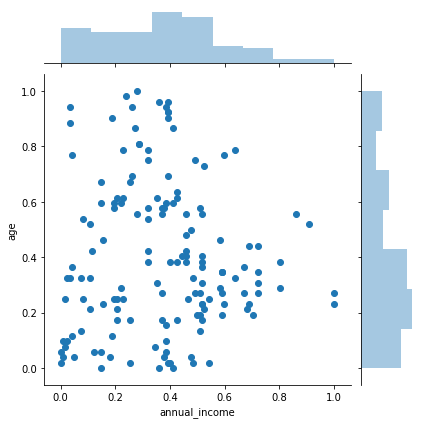

2


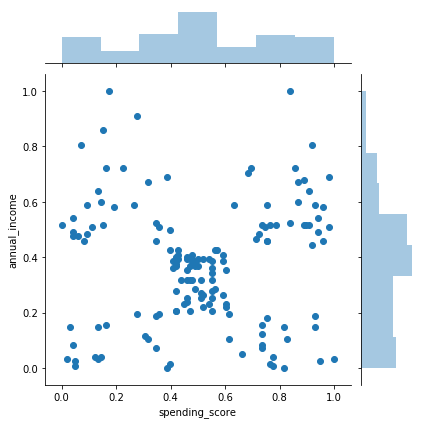

In [43]:
cols=list(train.select_dtypes('number'))
for i,col in enumerate(cols):
    sns.jointplot(data=train,x=cols[i],y=cols[i-1])
    print(i)
    plt.show()

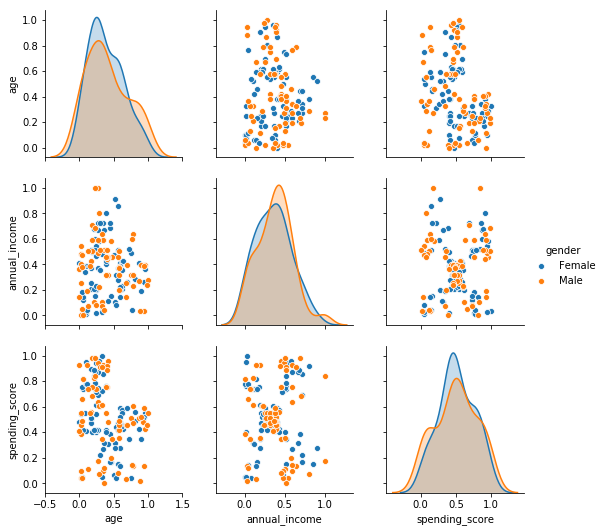

In [45]:
sns.pairplot(train,hue='gender')
plt.show()

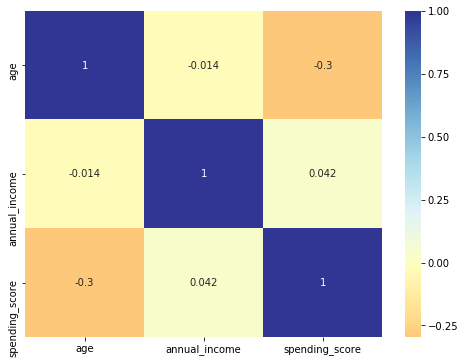

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),cmap='RdYlBu',annot=True,center=0)

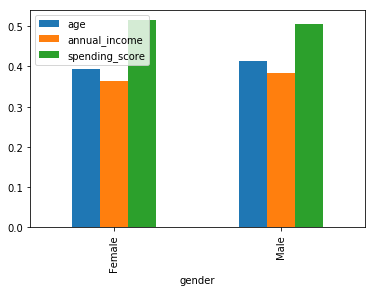

In [52]:
train.groupby('gender').mean().plot.bar()

USe the tips dataset from seaborn for the first exercise

In [6]:
df_tip=sns.load_dataset('tips')

In [7]:
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


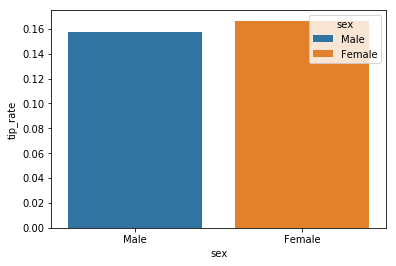

In [18]:
bad_tips=df_tip[['sex','tip_rate']].groupby('sex').mean().reset_index()
sns.barplot(x='sex',y='tip_rate',hue='sex',data=bad_tips,dodge=False)
plt.show()

In [15]:
df_tip['tip_rate']=df_tip.tip/df_tip.total_bill
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


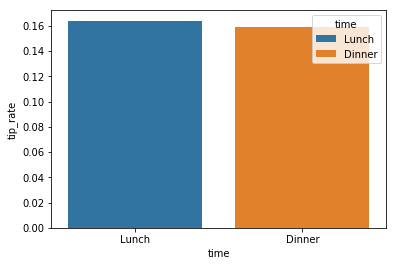

In [20]:
good_tips=df_tip[['tip_rate','time']].groupby('time').mean().reset_index()
sns.barplot(x='time',y='tip_rate',data=good_tips,hue='time',dodge=False)
plt.show()

In [8]:
df_tip.tip.mean()

2.9982786885245902

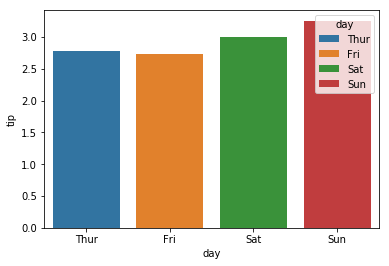

In [99]:
days=df_tip[['tip','day']].groupby('day').mean().reset_index()
sns.barplot(x='day',y='tip',data=days,hue='day',dodge=False)
plt.show()

In [21]:
import scipy as sp
sp.stats.ttest_ind(
    df_tip[df_tip.sex == 'Male'].tip_rate,
    df_tip[df_tip.sex == 'Female'].tip_rate)
#No a statistically significant difference between tipping between females
#and males

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [23]:
sp.stats.ttest_ind(
    df_tip[df_tip.smoker == 'No'].tip_rate,
    df_tip[df_tip.smoker == 'Yes'].tip_rate)
#No a statistically significant difference between tipping between smokers
#and nonsmokers

Ttest_indResult(statistic=-0.4796693002669869, pvalue=0.6318957776878522)

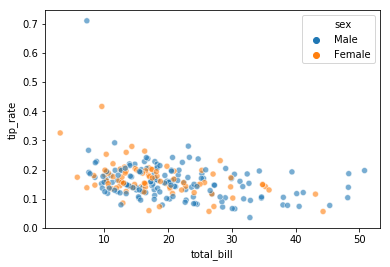

In [29]:
sns.scatterplot(x='total_bill',y='tip_rate',hue='sex',alpha=0.6,data=df_tip)
plt.show()